In [21]:
import pandas as pd
import seaborn as sns
import pcompress
from chains import *
from division_aware import num_division_splits
from gerrychain import Election

In [2]:
neutral = pd.read_csv("results/MI-13-agg_prop-True-50000-sep17.csv")

In [3]:
results = pd.read_csv("results/VA-11-agg_prop-True-50000-sep17.csv")

In [4]:
results["Unnamed: 0"]

0            0
1            1
2            2
3            3
4            4
         ...  
49995    49995
49996    49996
49997    49997
49998    49998
49999    49999
Name: Unnamed: 0, Length: 50000, dtype: int64

In [5]:
results["agg_prop"]

0       -0.209959
1       -0.119050
2       -0.119050
3       -0.028141
4       -0.028141
           ...   
49995   -0.573595
49996   -0.755414
49997   -0.755414
49998   -0.755414
49999   -0.755414
Name: agg_prop, Length: 50000, dtype: float64

<AxesSubplot:xlabel='Unnamed: 0', ylabel='agg_prop'>

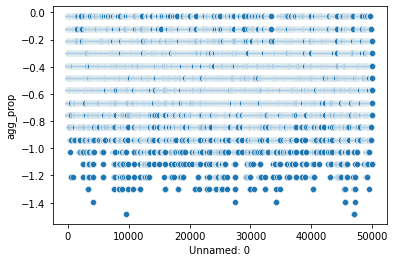

In [6]:
sns.scatterplot(x="Unnamed: 0", y="agg_prop", data=results)

(<AxesSubplot:xlabel='agg_prop', ylabel='Count'>, -0.3917771609459094)

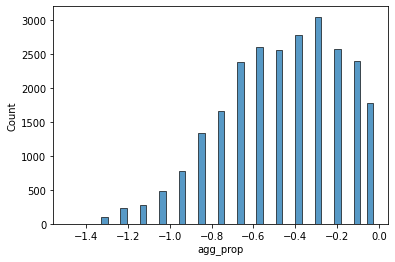

In [7]:
sns.histplot(results["agg_prop"][:25000]), results["agg_prop"][:25000].median()

(<AxesSubplot:xlabel='agg_prop', ylabel='Count'>, -0.4826862518549989)

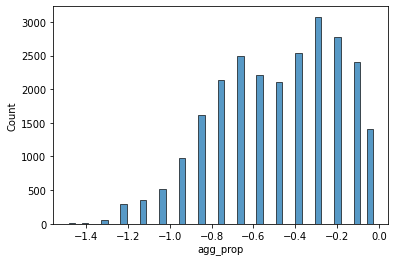

In [8]:
sns.histplot(results["agg_prop"][25000:]), results["agg_prop"][25000:].median()

(<AxesSubplot:xlabel='agg_prop', ylabel='Count'>, -0.1750133087188149)

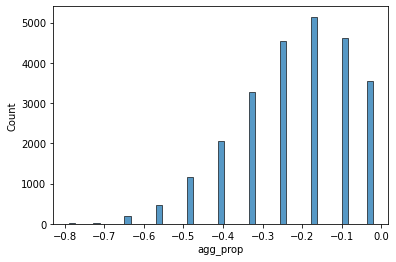

In [9]:
sns.histplot(neutral["agg_prop"][:25000]), neutral["agg_prop"][:25000].median()

(<AxesSubplot:xlabel='agg_prop', ylabel='Count'>, -0.1750133087188153)

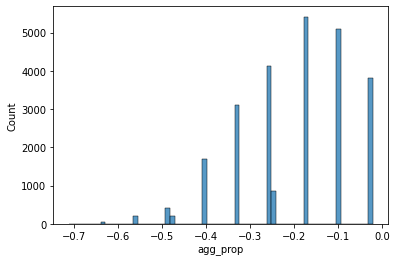

In [10]:
sns.histplot(neutral["agg_prop"][25000:]), neutral["agg_prop"][25000:].median()

In [24]:
graph = Graph.from_json(f"graphs/VA_vtd20.json")
saved_updaters, updaters = create_updaters("VA", graph, "TOTPOP", 11, absolute=True)
counties, nodes_by_county = get_divisions(graph, 'COUNTYFP20')

In [12]:
dict(updaters)

{'population': <gerrychain.updaters.tally.Tally at 0x7ff61ed38400>,
 'G18SEN': Election(parties=['dem', 'rep'], columns=['G18DSEN', 'G18RSEN'], alias=G18SEN),
 'G17GOV': Election(parties=['dem', 'rep'], columns=['G17DGOV', 'G17RGOV'], alias=G17GOV),
 'G17LTG': Election(parties=['dem', 'rep'], columns=['G17DLTG', 'G17RLTG'], alias=G17LTG),
 'G17ATG': Election(parties=['dem', 'rep'], columns=['G17DATG', 'G17RATG'], alias=G17ATG),
 'G16PRS': Election(parties=['dem', 'rep'], columns=['G16DPRS', 'G16RPRS'], alias=G16PRS),
 'agg_prop': <function chains.aggregate_proportionality.<locals>.updater(partition)>}

In [13]:
del updaters["agg_prop"]

In [26]:
cols = [k for k, v in updaters.items() if isinstance(v, Election)]

In [27]:
cols

['G18SEN', 'G17GOV', 'G17LTG', 'G17ATG', 'G16PRS']

In [53]:
%%time
cols = ["G18SEN", "G17ATG", "G17LTG", "G17GOV", "G16PRS"]
for partition in pcompress.Replay(graph, "results/VA-11-agg_prop-True-50000-sep17.chain", updaters = dict(updaters), geographic=True):
#     print()
#     print(partition["G18SEN"].percents_for_party)
    swing_tracker = [0]* len(partition.parts)
    for part in partition.parts.keys():
        times_won = 0
        for election_col in cols:
            election = partition[election_col].percents_for_party
            if election["rep"][part] >= election["dem"][part]:
                times_won += 1
        swing_tracker[times_won] += 1
    print(swing_tracker)
#     break
#     for col in cols:
#         get_d
#         print(col, partition[col].wins("rep")/11, partition[col].percent("rep"))

[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1

[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1

[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1

[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1

[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2

[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1

[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1

[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2

[5, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0

[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1

[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1

[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 4, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3

[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1

[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[5, 0, 0, 2, 1, 3, 0, 0, 0, 0, 0]
[5, 0, 0, 2, 1, 3, 0, 0, 0, 0, 0]
[5, 0, 0, 2, 1, 3, 0, 0, 0, 0, 0]
[5, 0, 0, 2, 1, 3, 0, 0, 0, 0, 0]
[5, 0, 0, 2, 1, 3, 0, 0, 0, 0, 0]
[5, 0, 0, 2, 1, 3, 0, 0, 0, 0, 0]
[5, 0, 0, 2, 1, 3, 0, 0, 0, 0, 0]
[5, 0, 0, 2, 1, 3, 0, 0, 0, 0, 0]
[5, 0, 0, 2, 1, 3, 0, 0, 0, 0, 0]
[5, 0, 0, 2, 1

[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0]
[5, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1

[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1

[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3

[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2

[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3

[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2

[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0

[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0

[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[5, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[5, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1

[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2

[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2

[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0

[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1

[7, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 0, 1, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 0, 1, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 0, 1, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 0, 1, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 0, 1, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1

[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1

[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2

[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1

[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0

[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1

[8, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[6, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2

[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1

[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1

[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2

[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2

[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0

[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2

[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2

[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2

[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0

[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1

[7, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1

[5, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[5, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[5, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[5, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[5, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0]
[5, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3

[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2

[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2

[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0

[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1

[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2

[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3

[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1

[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3

[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1

[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 2

[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1

[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2

[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3

[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2

[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1

[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0

[5, 0, 1, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 1, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 1, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 1, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 1, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3

[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2

[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3

[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[5, 1, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[5, 1, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[5, 1, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0

[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1

[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2

[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1

[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0

[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2

[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3

[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[5, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[5, 2, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[5, 2, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[5, 2, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 2, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 2, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 2, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[5, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[5, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[5, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[5, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2

[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0]
[7, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2

[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2

[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1

[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2

[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2

[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1

[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2

[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1

[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0

[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1

[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1

[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1

[8, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1

[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2

[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2

[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1

[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0

[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1

[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1

[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0

[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0

[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2

[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1

[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2

[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3

[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0

[5, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1

[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3

[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2

[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2

[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3

[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2

[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0

[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2

[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 1, 0, 0

[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2

[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1

[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 0, 0, 2, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3

[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1

[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2

[5, 1, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2

[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0

[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3

[5, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1

[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1

[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0

[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1

[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3

[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1

[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2

[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[5, 0, 1, 2, 1, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3

[5, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1

[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1

[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1

[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1

[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1

[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 2

[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1

[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1

[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1

[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3

[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2

[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1

[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2

[8, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1

[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2

[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1

[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1

[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0

[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2

[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2

[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2

[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[5, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0

[5, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1

[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2

[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3

[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2

[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[5, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[5, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[5, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[5, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[5, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[5, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[5, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[5, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[5, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[5, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[5, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[5, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[5, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[5, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[5, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[5, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[5, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[5, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[5, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[5, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[5, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[5, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[5, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[5, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[5, 2, 0, 0, 2

[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 1, 0

[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3

[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 3

[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1

[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1

[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1

[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 1

[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3

[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1

[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1

[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1

[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2

[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0

[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 0, 1, 1, 1

[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1

[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[5, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2

[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 0, 4, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 0

[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 2, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[5, 2, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[5, 2, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[5, 2, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[5, 2, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[5, 2, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[5, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[5, 2, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[5, 2, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[5, 2, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 2, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 2, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 2, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 2, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 2, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 2, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 2, 0, 0, 1

[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1

[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 2

[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 2

[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0

[6, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0]
[6, 1, 1, 0, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[6, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[6, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 0, 2

[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0]
[6, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[6, 0, 1, 1, 1

In [11]:
len(set(neutral["agg_prop"]))

296